In [0]:
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import comb
import numpy as np
import time

In [0]:
extra = (2, 2, 12, 12, 5)                    
## Extra card except the 12*13 standard num
card = [[i] * 12 for i in range(1, 14, 1)]   
## 12*13
card = np.reshape(card, 156)                
card = np.append(card, extra)

In [3]:
print("Total number of cards is : ", len(card))
print('')
print("The Deck : ")
print(np.sort(card))

Total number of cards is :  161

The Deck : 
[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13]


In [4]:
print("Number of all the events/possibilities : ", int(comb(len(card), 4)))

Number of all the events/possibilities :  26964280


In [0]:
ls = combinations(card, 4)
## It seems that list is faster than numpy for such situation

F_card_num = [0] * int(comb(len(card), 4))   
## Number of First Player's Drawn Cards
Range_card = [0] * int(comb(len(card), 4))   
## Range of Four cards' Number

In [6]:
start = time.clock()

i = 0
for l in ls:
   F_card = np.where( (l == np.max(l)) | (l == np.min(l)) )[0]
   F_card_num[i] = len(F_card)
   Range_card[i] = np.max(l) - np.min(l)
   i += 1

end = time.clock()
print ("Total Running Time(TUT) : ", end-start)


Total Running Time(TUT) :  953.263362


In [7]:
F_card_num = np.array(F_card_num)
print("Expectation of First Player's Drawn Cards : ", np.mean(F_card_num))

Expectation of First Player's Drawn Cards :  2.2961608468685237


In [8]:
F_card_count = Counter(F_card_num)       
## Count of number of cards for the first player
for i in range(2, 5) :  
    F_card_count[i] = np.round(F_card_count[i]/len(F_card_num), 4)
F_card_count

Counter({2: 0.7363, 3: 0.2313, 4: 0.0324})

In [0]:
S_chance = np.where(F_card_num == 2)[0]  
##Chances when second player could draw cards
Range_card = np.array(Range_card)        
Range_two_card = Range_card[S_chance]

In [10]:
count_two_range = Counter(Range_two_card)  
## Count of range for two cards events
for i in range(2, 13) :  
    count_two_range[i] = np.round(count_two_range[i]/len(Range_two_card), 4)
count_two_range

Counter({2: 0.006,
         3: 0.0221,
         4: 0.0453,
         5: 0.0717,
         6: 0.0988,
         7: 0.1235,
         8: 0.1422,
         9: 0.1492,
         10: 0.1467,
         11: 0.127,
         12: 0.0676})

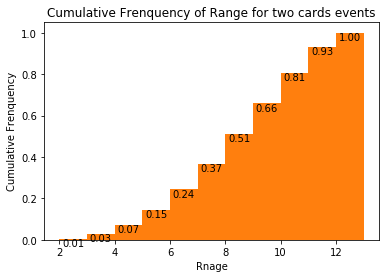

In [11]:
plt.hist(Range_two_card, bins = np.arange(2, 14, 1), 
         density = True, cumulative = True)
plt.title('Cumulative Frenquency of Range for two cards events')
plt.xlabel('Rnage')
plt.ylabel('Cumulative Frenquency')
prob,left,rectangle = plt.hist(x=Range_two_card, bins=np.arange(2, 14, 1), 
                               density=True, histtype='bar', cumulative=True)
for x, y in zip(left, prob):
    plt.text(x + 1 / 2, y + 0.003, '%.2f' % y, ha='center', va='top')
plt.show()